In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as ts
import statistics
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader

In [2]:
df = pd.read_csv('fama_french_3_data/AAPL.csv')
ff_factors = pd.read_csv('fama_french_3_data/famafrench_daily_factor.csv')
risk_free_rate = pd.read_csv('fama_french_3_data/^TNX.csv')
ff_factors.drop(['Date_str'], axis=1, inplace=True)
df = df.set_index('Date')
ff_factors = ff_factors.set_index('Date')
risk_free_rate = risk_free_rate.set_index('Date')

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.481125,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.203232,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.489639,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,169.610214,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,169.777847,86709100


In [3]:
df = df.join(risk_free_rate['Adj Close'], rsuffix=' Risk Free')

df.head()

,Open,High,Low,Close,Adj Close,Volume,Adj Close Risk Free
Date,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.481125,104487900,1.628
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.203232,99310400,1.668
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.489639,94537600,1.705
2022-01-06,172.699997,175.300003,171.639999,172.000000,169.610214,96904000,1.733
2022-01-07,172.889999,174.139999,171.029999,172.169998,169.777847,86709100,1.771


In [4]:
# YEAR_DAYS = 252
# df['Daily_return'] = np.log(df['Adj Close']/df['Adj Close'].shift(1))
# df['Daily_return'].fillna(0, inplace=True)
# df['Excess_return'] = ((df['Daily_return'].rolling(window=YEAR_DAYS).mean() * YEAR_DAYS).apply(lambda x: np.exp(x)) - 1) - df['Adj Close Risk Free']/100

In [4]:
YEAR_DAYS = 250
daily_returns = df['Adj Close'].pct_change().dropna()
df['Excess_return'] = ((daily_returns.rolling(window=YEAR_DAYS).mean() + 1) ** YEAR_DAYS - 1) - df['Adj Close Risk Free']/100

df.head()

,Open,High,Low,Close,Adj Close,Volume,Adj Close Risk Free,Excess_return
Date,,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.481125,104487900,1.628,NaN
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.203232,99310400,1.668,NaN
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.489639,94537600,1.705,NaN
2022-01-06,172.699997,175.300003,171.639999,172.000000,169.610214,96904000,1.733,NaN
2022-01-07,172.889999,174.139999,171.029999,172.169998,169.777847,86709100,1.771,NaN


In [5]:
ff_factors

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-01,0.10,-0.25,-0.27,0.009
1926-07-02,0.45,-0.33,-0.06,0.009
1926-07-06,0.17,0.30,-0.39,0.009
1926-07-07,0.09,-0.58,0.02,0.009
1926-07-08,0.21,-0.38,0.19,0.009
...,...,...,...,...
2024-05-24,0.72,0.03,0.16,0.020
2024-05-28,-0.04,0.28,-0.90,0.020
2024-05-29,-0.77,-0.29,-0.62,0.020


In [6]:
df = df.join(ff_factors)

df.head()

,Open,High,Low,Close,Adj Close,Volume,Adj Close Risk Free,Excess_return,Mkt-RF,SMB,HML,RF
Date,,,,,,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.481125,104487900,1.628,NaN,0.73,0.34,0.78,0.0
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.203232,99310400,1.668,NaN,-0.29,-0.82,3.63,0.0
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.489639,94537600,1.705,NaN,-2.28,-1.46,2.60,0.0
2022-01-06,172.699997,175.300003,171.639999,172.000000,169.610214,96904000,1.733,NaN,0.00,0.20,1.75,0.0
2022-01-07,172.889999,174.139999,171.029999,172.169998,169.777847,86709100,1.771,NaN,-0.48,-1.32,2.02,0.0


In [7]:
df

,Open,High,Low,Close,Adj Close,Volume,Adj Close Risk Free,Excess_return,Mkt-RF,SMB,HML,RF
Date,,,,,,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.481125,104487900,1.628,NaN,0.73,0.34,0.78,0.0
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.203232,99310400,1.668,NaN,-0.29,-0.82,3.63,0.0
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.489639,94537600,1.705,NaN,-2.28,-1.46,2.60,0.0
2022-01-06,172.699997,175.300003,171.639999,172.000000,169.610214,96904000,1.733,NaN,0.00,0.20,1.75,0.0
2022-01-07,172.889999,174.139999,171.029999,172.169998,169.777847,86709100,1.771,NaN,-0.48,-1.32,2.02,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-19,224.820007,226.800003,223.279999,224.309998,224.309998,49151500,4.239,0.162322,NaN,NaN,NaN,NaN
2024-07-22,227.009995,227.779999,223.089996,223.960007,223.960007,48201800,4.260,0.155174,NaN,NaN,NaN,NaN
2024-07-23,224.369995,226.940002,222.679993,225.009995,225.009995,39960300,4.239,0.155593,NaN,NaN,NaN,NaN


In [8]:
df.dropna()

,Open,High,Low,Close,Adj Close,Volume,Adj Close Risk Free,Excess_return,Mkt-RF,SMB,HML,RF
Date,,,,,,,,,,,,
2022-12-30,128.410004,129.949997,127.430000,129.929993,128.868332,77034200,3.879,-0.274279,-0.22,0.12,-0.03,0.016
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048042,112117500,3.793,-0.292102,-0.47,0.07,-0.12,0.017
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327499,89113600,3.709,-0.263185,0.81,0.54,0.05,0.017
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998444,80962700,3.720,-0.258563,-1.14,-0.18,1.21,0.017
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700,3.569,-0.228642,2.21,-0.06,0.04,0.017
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-24,188.820007,190.580002,188.039993,189.979996,189.979996,36294600,4.467,0.066512,0.72,0.03,0.16,0.020
2024-05-28,191.509995,193.000000,189.100006,189.990005,189.990005,52280100,4.542,0.054043,-0.04,0.28,-0.90,0.020
2024-05-29,189.610001,192.250000,189.509995,190.289993,190.289993,53068000,4.624,0.055270,-0.77,-0.29,-0.62,0.020


fama french model 

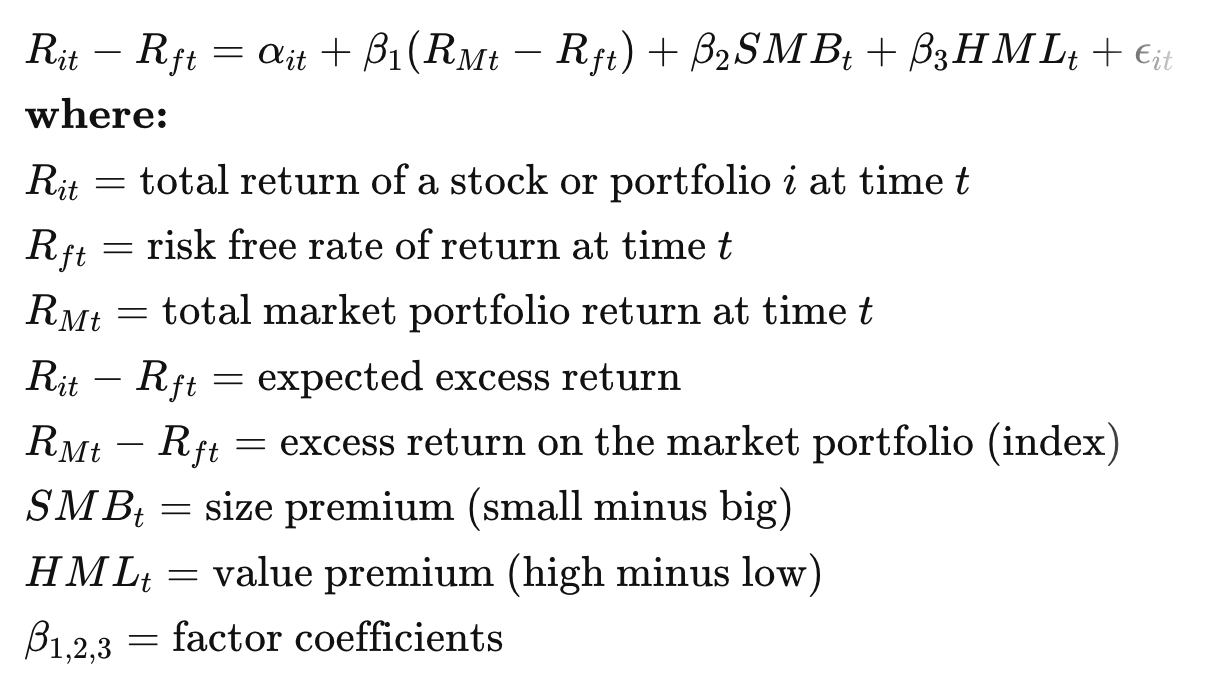

target-features

y = Excess_return
x1 = Mkt-Rf
x2 = SMB
x3 = HML

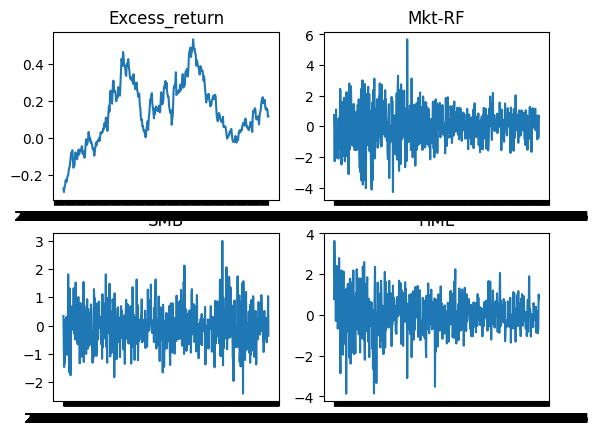

In [9]:
plt.subplot(2,2,1)
plt.plot(df['Excess_return'])
plt.title('Excess_return')

plt.subplot(2,2,2)
plt.plot(df['Mkt-RF'])
plt.title('Mkt-RF')

plt.subplot(2,2,3)
plt.plot(df['SMB'])
plt.title('SMB')

plt.subplot(2,2,4)
plt.plot(df['HML'])
plt.title('HML')

plt.show()

In [10]:
df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,Adj Close Risk Free,Excess_return,Mkt-RF,SMB,HML,RF
Date,,,,,,,,,,,,
2022-12-30,128.410004,129.949997,127.430000,129.929993,128.868332,77034200,3.879,-0.274279,-0.22,0.12,-0.03,0.016
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048042,112117500,3.793,-0.292102,-0.47,0.07,-0.12,0.017
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327499,89113600,3.709,-0.263185,0.81,0.54,0.05,0.017
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998444,80962700,3.720,-0.258563,-1.14,-0.18,1.21,0.017
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700,3.569,-0.228642,2.21,-0.06,0.04,0.017
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-24,188.820007,190.580002,188.039993,189.979996,189.979996,36294600,4.467,0.066512,0.72,0.03,0.16,0.020
2024-05-28,191.509995,193.000000,189.100006,189.990005,189.990005,52280100,4.542,0.054043,-0.04,0.28,-0.90,0.020
2024-05-29,189.610001,192.250000,189.509995,190.289993,190.289993,53068000,4.624,0.055270,-0.77,-0.29,-0.62,0.020


In [11]:
# dataset class
import torch
from torch.utils.data import Dataset, DataLoader

class FCN_dataset(Dataset):
    def __init__(self, df, split_type):
        self.df = df
        self.dates = df.index
        self.y = df['Excess_return']
        self.X = df[["Mkt-RF",	"SMB", "HML"]]
        
        self.y = self.y.to_numpy()
        self.X = self.X.to_numpy()
        
        # normalise the X
        # Double check that this function normalises each column to its own
        scaler = MinMaxScaler(feature_range=(-1, 1))
        self.X = scaler.fit_transform(self.X)
        
        self.X = torch.tensor(self.X, dtype=torch.float32)
        self.y = torch.tensor(self.y, dtype=torch.float32)

        # split into train val test
        train_size,val_size,test_size=0.7,0.2,0.1
        if split_type=='train':
            self.X = self.X[:int(len(df)*train_size)]
            self.y = self.y[:int(len(df)*train_size)]
        elif split_type=='val':
            self.X = self.X[int(len(df)*train_size):int(len(df)*train_size)+int(len(df)*val_size)]
            self.y = self.y[int(len(df)*train_size):int(len(df)*train_size)+int(len(df)*val_size)]
        elif split_type=='test':
            self.X = self.X[int(len(df)*train_size)+int(len(df)*val_size):]
            self.y = self.y[int(len(df)*train_size)+int(len(df)*val_size):]
        
    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx],self.y[idx]

In [ ]:
# dataset 

train_dataset = FCN_dataset(df=df,split_type='train')
val_dataset = FCN_dataset(df=df,split_type='val')
test_dataset = FCN_dataset(df=df,split_type='test')

print(train_dataset.X.shape,val_dataset.X.shape,test_dataset.X.shape)
print(train_dataset.y.shape,val_dataset.y.shape,test_dataset.y.shape)

In [ ]:
# dataloder

In [ ]:
# model class

In [ ]:
# training loop